# BUSA3020 - Assignment 3  

**Assignment Points**: 100    
**Assignment Weight**: 20%   
**Due Date**: Friday of Week 11 at 11:59pm   




---

## About This Assignment
Customer segmentation is the process of dividing customers into groups based on common characteristics so companies can market to each group effectively and appropriately. It can be employed by all types of business, regardless of size, industry and whether they sell online or in person. For example, a small business selling guitars might decide to promote lower-priced products to younger guitarists and higher-priced premium guitars to older musicians based on segment knowledge which tells them that younger musicians have less disposable income than their older counterparts.  

<hr style="width:35%;margin-left:0;"> 

## Task
You are employed by a large supermarket chain to perform customer segmentation analysis. In particular, you are provided with a dataset on 2000 customers that has been collected through loyalty cards that customers use at checkout, and includes variables such as customer age, gender, annual income, etc. 

Your task is to analyse the data in Python using relevant techniques covered in lectures, and identify customer segments given the dataset. You will then collect your results in tables and diagrams which you will include in a report of **up to 1000 words** (not counting tables and figures). Make sure your report is informative, intuitive, and easy to understand by the management, who may not have technical expertise. 

Your report should include the following headings:

1. **Introduction** (10 marks)
    - Motivate the problem and what you are trying to achomplish in this report
2. **Exploratory Data Analysis** (20 marks)
    - Perform basic exploratory data analysis, present and comment on summary statistics, etc.
3. **Customer Segmentation** (40 marks)
    - Apply clustering analysis we covered in lectures
    - Choose an optimal number of customer segments/clusters  
    - Interpret identified clusters in terms customer profiles, e.g. there may be a cluster of university educated females living in a mid-sized city
    - Use two different clustering techniques
    - How do the clusters identified by the two techniques compare?
4. **Recommendations** (20 marks)
    - Provide some suggestions regarding marketing techniques that may be developed for different clusters of customers 
5. **Conclusion** (10 marks)
    - A brief summary of what you have done in the report

<hr style="width:35%;margin-left:0;"> 

## Submission   
You will need to submit two files:   
1. One Jupyter Notebook containing Python code used in your analysis. Make sure your code is clean and easy to understand by the markers. Include comments.  
2. One PDF document containing your report to be submitted to the management. The report should be self-contained and include all relevant tables/graphs that you generated using the submitted Jupyter notebook. You can write the report in Word, and then save it as a PDF file which will be submitted.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/data.csv')
df = df.drop(columns=['ID'])

In [3]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


In [5]:
df.Income.describe()

count      2000.000000
mean     120954.419000
std       38108.824679
min       35832.000000
25%       97663.250000
50%      115548.500000
75%      138072.250000
max      309364.000000
Name: Income, dtype: float64

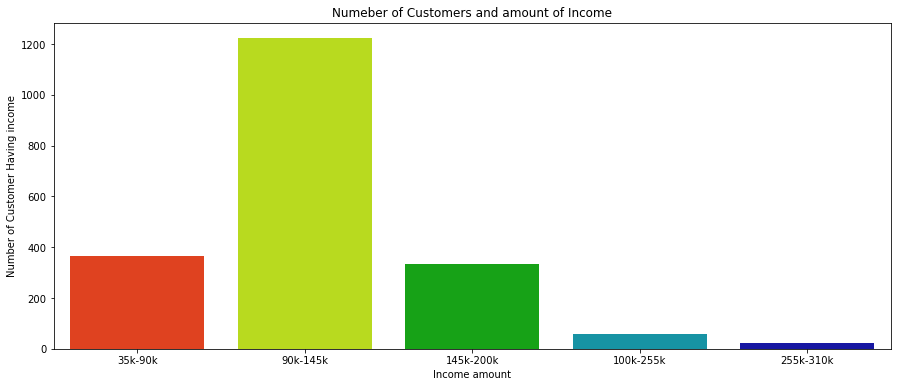

In [6]:
income35k_90k = df["Income"][(df["Income"] >= 35000) & (df["Income"] <= 90000)]
income90k_145k = df["Income"][(df["Income"] >= 90001) & (df["Income"] <= 145000)]
income145k_200k = df["Income"][(df["Income"] >= 145001) & (df["Income"] <= 200000)]
income200k_255k = df["Income"][(df["Income"] >= 200001) & (df["Income"] <= 255000)]
income255k_310k = df["Income"][(df["Income"] >= 255001) & (df["Income"] <= 310000)]

icx = ["35k-90k", "90k-145k", "145k-200k", "100k-255k", "255k-310k"]
icy = [len(income35k_90k.values), len(income90k_145k.values), len(income145k_200k.values), len(income200k_255k.values), len(income255k_310k.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=icx, y=icy, palette="nipy_spectral_r")
plt.title("Numeber of Customers and amount of Income")
plt.xlabel("Income amount")
plt.ylabel("Number of Customer Having income")
plt.show()

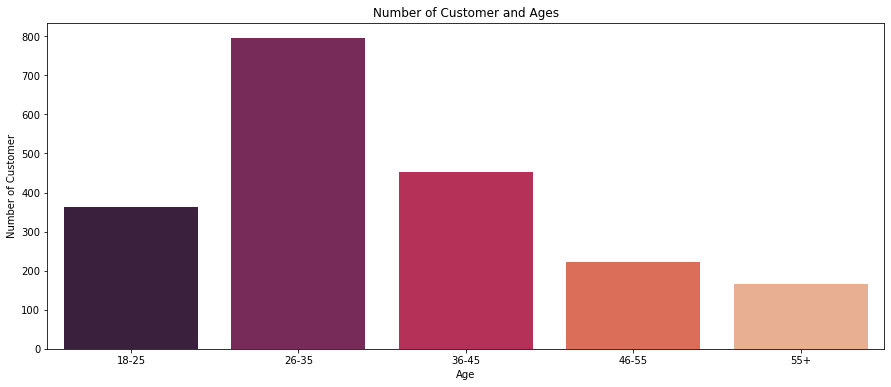

In [7]:
age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [8]:
print('Number of Male Customers:',len(df[df.Sex== 1]),'customers')
print('Number of Female Customers:', len(df[df.Sex== 0]),'customers')
print('-----------------------------------')

print('Number of Unemployed Customers:',len(df[df.Occupation == 0]),'customers')
print('Number of Skilled Employed Customers:', len(df[df.Occupation == 1]),'customers')
print('Number of Managament Customers:', len(df[df.Occupation == 2]),'customers')

print('-----------------------------------')
print('Number of Single Customers:',len(df[df['Marital status'] == 0]),'customers')
print('Number of Non-single Customers:',len(df[df['Marital status'] == 1]),'customers')
print('-----------------------------------')

print('Unknown education :',len(df[df.Education == 0]),'customers')
print('Highschool level :', len(df[df.Education == 1]),'customers')
print('University level:', len(df[df.Education == 2]),'customers')
print('Graduate:', len(df[df.Education == 2]),'customers')

print('-----------------------------------')
print('Customers live in small city:',len(df[df['Settlement size'] == 0]),'customers')
print('Customers live in Mid-size city:',len(df[df['Settlement size'] == 1]),'customers')
print('Customers live in Big city:',len(df[df['Settlement size'] == 1]),'customers')


Number of Male Customers: 914 customers
Number of Female Customers: 1086 customers
-----------------------------------
Number of Unemployed Customers: 633 customers
Number of Skilled Employed Customers: 1113 customers
Number of Managament Customers: 254 customers
-----------------------------------
Number of Single Customers: 1007 customers
Number of Non-single Customers: 993 customers
-----------------------------------
Unknown education : 287 customers
Highschool level : 1386 customers
University level: 291 customers
Graduate: 291 customers
-----------------------------------
Customers live in small city: 989 customers
Customers live in Mid-size city: 544 customers
Customers live in Big city: 544 customers


In [9]:
df.dtypes

Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [10]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


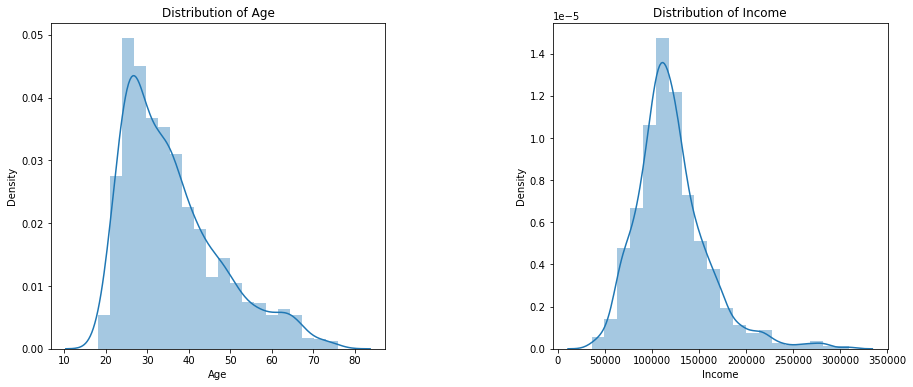

In [11]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distribution of {}'.format(x))
plt.show()

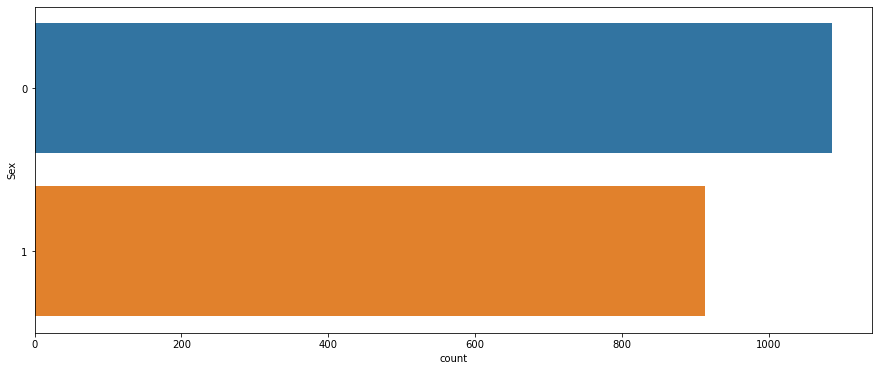

In [12]:
plt.figure(1, figsize=(15,6))
sns.countplot(y='Sex', data = df)
plt.show()

In [13]:
#X = df.loc[:,["Age","Income"]].value
X = df.loc[:,['Age','Income']].values
X1 = df.values

# Kmeans Clustering

In [14]:
km_plus = KMeans(n_clusters=3, 
            init='k-means++',  # use starndard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(X1)

print(y_km_plus)
print(f'\nClusters:\n {km_plus.cluster_centers_}')

[0 0 2 ... 2 2 2]

Clusters:
 [[3.86740331e-01 4.48618785e-01 3.77314917e+01 1.07182320e+00
  1.31283906e+05 9.90055249e-01 9.48066298e-01]
 [2.93333333e-01 4.57777778e-01 4.38755556e+01 1.34666667e+00
  1.97576120e+05 1.57777778e+00 1.36444444e+00]
 [5.72413793e-01 5.56321839e-01 3.19528736e+01 9.22988506e-01
  9.03934207e+04 4.25287356e-01 3.59770115e-01]]


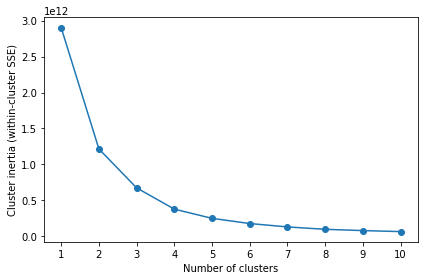

In [15]:
inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(X1)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

In [16]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X)

print(label)

[0 1 3 ... 3 0 3]


In [17]:
print(kmeans.cluster_centers_)

[[3.43819517e+01 1.14750034e+05]
 [4.09629630e+01 1.54064475e+05]
 [4.45904762e+01 2.25124867e+05]
 [3.22318841e+01 7.90856128e+04]]


In [18]:

km = KMeans(n_clusters=4, 
            init='random',  # use standard k-means rather than k-means++ (see below)
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km = km.fit_predict(X)

print(y_km)
print(f'\nClusters:\n {km.cluster_centers_}')

[3 1 0 ... 0 3 0]

Clusters:
 [[3.21963190e+01 7.93064765e+04]
 [4.09406593e+01 1.54237231e+05]
 [4.45904762e+01 2.25124867e+05]
 [3.44521556e+01 1.14944185e+05]]


In [19]:
df['cluster_label'] = y_km

In [20]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3
1996,1,1,27,1,117744,1,0,3
1997,0,0,31,0,86400,0,0,0
1998,1,1,24,1,97968,0,0,3


## Create 4 new data sets which contain information of customer from each cluster 
### Cluster 0

In [21]:
df_cl0 = df.loc[df['cluster_label']==0]
df_cl0# default cluster 0 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label
2,0,0,49,1,89210,0,0,0
13,0,0,60,2,89374,0,0,0
15,1,1,32,1,88428,0,0,0
22,0,0,48,1,89804,0,0,0
25,0,0,36,1,71909,0,0,0
...,...,...,...,...,...,...,...,...
1987,0,0,25,0,66628,0,0,0
1990,1,1,31,1,78758,0,0,0
1993,1,0,38,1,87670,0,0,0
1997,0,0,31,0,86400,0,0,0


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


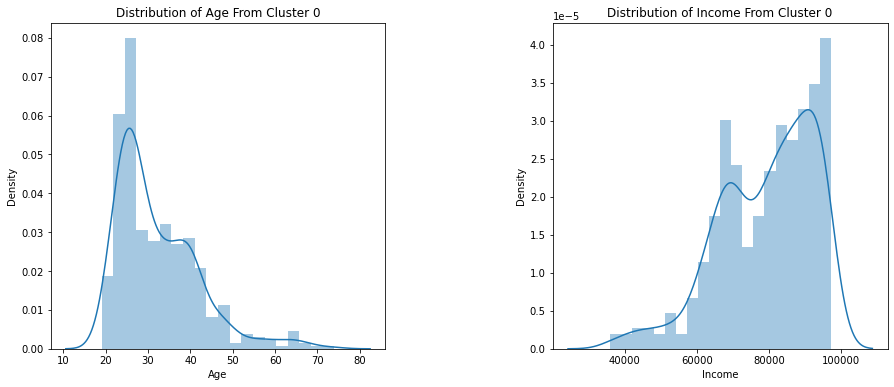

In [22]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_cl0[x], bins = 20)
    plt.title('Distribution of {} From Cluster 0'.format(x))
plt.show()

/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/1606102069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl0['Sex'] = df_cl0['Sex'].map({0:'MALE', 1:'FEMALE'})


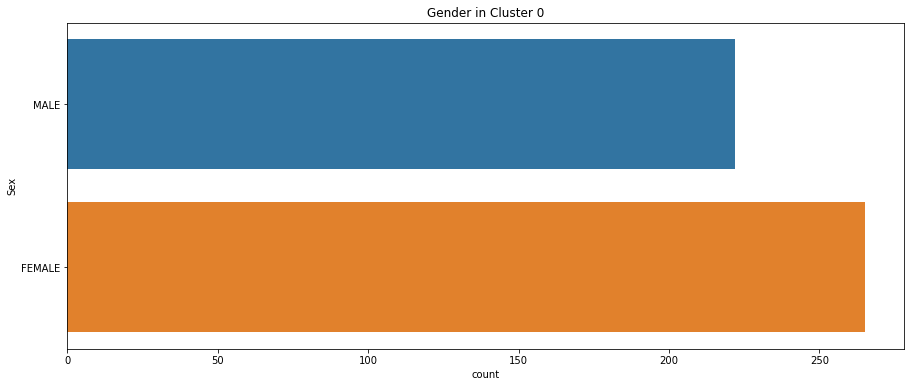

In [23]:
df_cl0['Sex'] = df_cl0['Sex'].map({0:'MALE', 1:'FEMALE'})
plt.figure(1, figsize=(15,6))
sns.countplot(y='Sex', data = df_cl0)
plt.title("Gender in Cluster 0")
plt.show()

In [24]:
df_cl0['Marital status'] = df_cl0['Marital status'].map({0:'Single', 1:'Non_single'})

/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/3173634769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl0['Marital status'] = df_cl0['Marital status'].map({0:'Single', 1:'Non_single'})


/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2687639792.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl0['Education'] = df_cl0['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2687639792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl0['Occupation'] = df_cl0['Occupation'].map({0:'Unemployed', 1:'Skilled Employed',2:'Management'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/

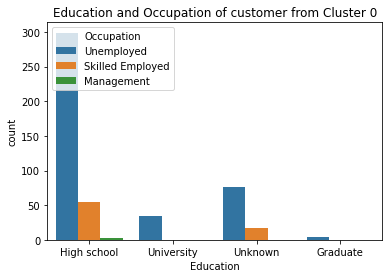

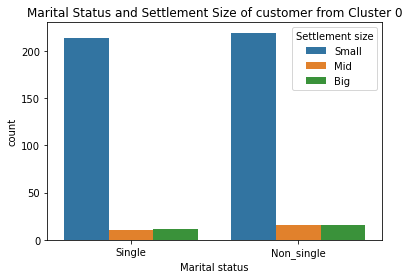

In [25]:
df_cl0['Education'] = df_cl0['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})

df_cl0['Occupation'] = df_cl0['Occupation'].map({0:'Unemployed', 1:'Skilled Employed',2:'Management'})

df_cl0['Settlement size'] = df_cl0['Settlement size'].map({0:'Small', 1:'Mid',2:'Big'})

sns.countplot(x = 'Education',
              hue = 'Occupation',
              data = df_cl0)
plt.title("Education and Occupation of customer from Cluster 0")
plt.show()

sns.countplot(x = 'Marital status',
              hue = 'Settlement size',
              data = df_cl0)
plt.title("Marital Status and Settlement Size of customer from Cluster 0")
plt.show()

### Cluster 1

In [26]:
df_cl1 = df.loc[df['cluster_label']==1]
df_cl1

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label
1,1,1,22,1,150773,1,2,1
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
5,0,0,35,1,144848,0,0,1
6,0,0,53,1,156495,1,1,1
...,...,...,...,...,...,...,...,...
1550,1,1,37,1,145140,1,1,1
1583,1,1,31,1,138307,1,1,1
1592,1,1,44,2,143343,1,1,1
1594,1,0,33,1,138525,1,1,1


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


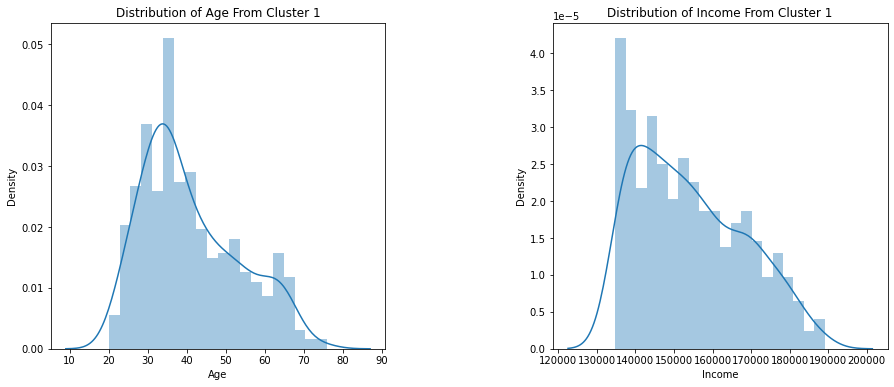

In [27]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_cl1[x], bins = 20)
    plt.title('Distribution of {} From Cluster 1'.format(x))
plt.show()

/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/1722727880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl1['Sex'] = df_cl1['Sex'].map({0:'MALE', 1:'FEMALE'})


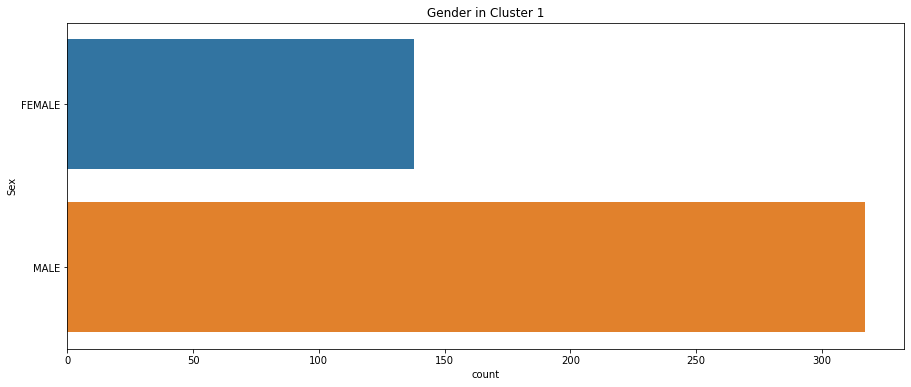

In [28]:
df_cl1['Sex'] = df_cl1['Sex'].map({0:'MALE', 1:'FEMALE'})
plt.figure(1, figsize=(15,6))
sns.countplot(y='Sex', data = df_cl1)
plt.title("Gender in Cluster 1")
plt.show()

/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2978176203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl1['Education'] = df_cl1['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2978176203.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl1['Marital status'] = df_cl1['Marital status'].map({0:'Single', 1:'Non_single'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195

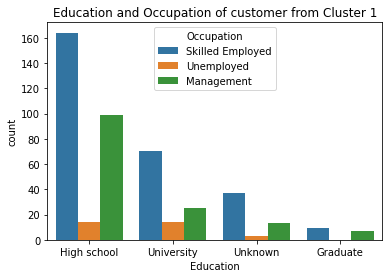

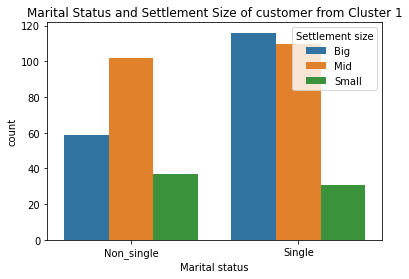

In [29]:
df_cl1['Education'] = df_cl1['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})

df_cl1['Marital status'] = df_cl1['Marital status'].map({0:'Single', 1:'Non_single'})

df_cl1['Occupation'] = df_cl1['Occupation'].map({0:'Unemployed', 1:'Skilled Employed',2:'Management'})

df_cl1['Settlement size'] = df_cl1['Settlement size'].map({0:'Small', 1:'Mid',2:'Big'})

sns.countplot(x = 'Education',
              hue = 'Occupation',
              data = df_cl1)
plt.title("Education and Occupation of customer from Cluster 1")
plt.show()

sns.countplot(x = 'Marital status',
              hue = 'Settlement size',
              data = df_cl1)
plt.title("Marital Status and Settlement Size of customer from Cluster 1")
plt.show()

### Cluster 2

In [49]:
df_cl2

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label
7,MALE,Single,35,High school,193621,Management,Mid,2
18,FEMALE,Non_single,44,University,261952,Management,Big,2
56,MALE,Single,52,High school,202575,Management,Big,2
63,MALE,Single,25,Unknown,227385,Skilled Employed,Big,2
87,MALE,Single,47,High school,241068,Skilled Employed,Mid,2
...,...,...,...,...,...,...,...,...
1090,MALE,Single,71,University,192360,Management,Mid,2
1092,FEMALE,Non_single,45,University,260847,Management,Big,2
1093,MALE,Single,65,University,285647,Management,Big,2
1097,MALE,Single,57,University,281647,Management,Mid,2


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


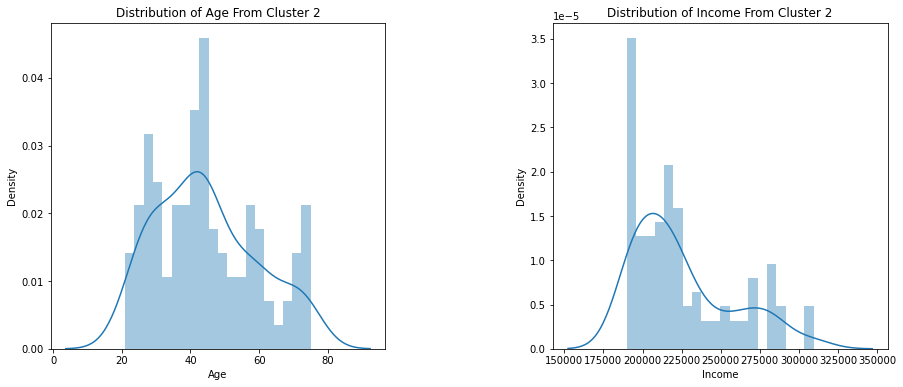

In [30]:
df_cl2 = df.loc[df['cluster_label']==2]

plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_cl2[x], bins = 20)
    plt.title('Distribution of {} From Cluster 2'.format(x))
plt.show()

/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2685396187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl2['Sex'] = df_cl2['Sex'].map({0:'MALE', 1:'FEMALE'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2685396187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl2['Education'] = df_cl2['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/2685396187.py:5: SettingWit

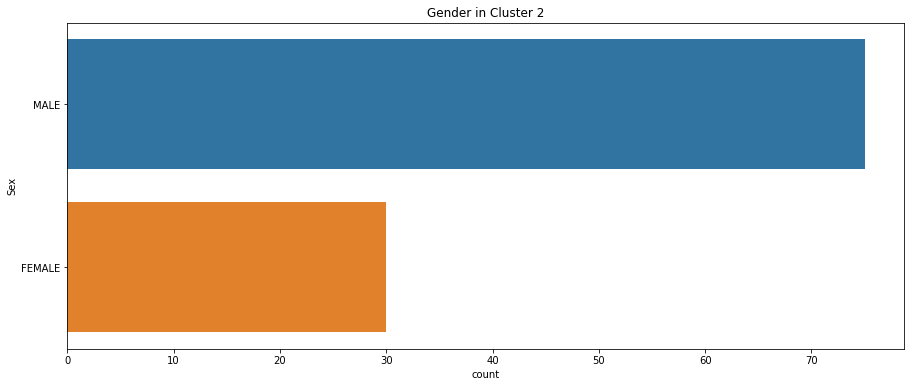

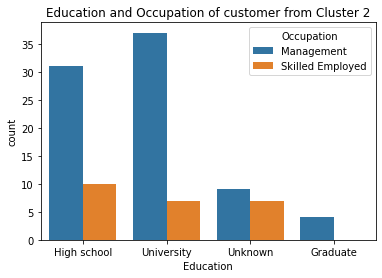

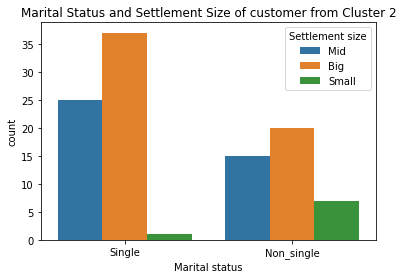

In [31]:
df_cl2['Sex'] = df_cl2['Sex'].map({0:'MALE', 1:'FEMALE'})

df_cl2['Education'] = df_cl2['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})

df_cl2['Marital status'] = df_cl2['Marital status'].map({0:'Single', 1:'Non_single'})

df_cl2['Occupation'] = df_cl2['Occupation'].map({0:'Unemployed', 1:'Skilled Employed',2:'Management'})

df_cl2['Settlement size'] = df_cl2['Settlement size'].map({0:'Small', 1:'Mid',2:'Big'})

plt.figure(1, figsize=(15,6))
sns.countplot(y='Sex', data = df_cl2)
plt.title("Gender in Cluster 2")
plt.show()

sns.countplot(x = 'Education',
              hue = 'Occupation',
              data = df_cl2)
plt.title("Education and Occupation of customer from Cluster 2")
plt.show()

sns.countplot(x = 'Marital status',
              hue = 'Settlement size',
              data = df_cl2)
plt.title("Marital Status and Settlement Size of customer from Cluster 2")
plt.show()

### cluster 3

/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


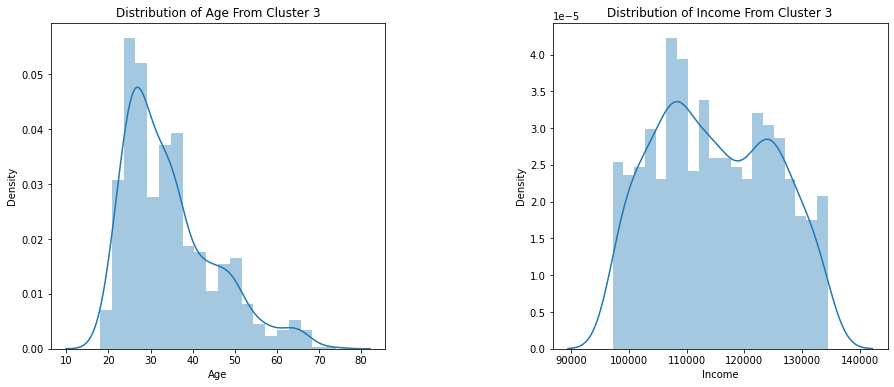

In [32]:
df_cl3 = df.loc[df['cluster_label']==3]

plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_cl3[x], bins = 20)
    plt.title('Distribution of {} From Cluster 3'.format(x))
plt.show()


/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/265637454.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl3['Sex'] = df_cl3['Sex'].map({0:'MALE', 1:'FEMALE'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/265637454.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl3['Education'] = df_cl3['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})
/var/folders/mx/w4srj63j0m73hzs7xw9ngqlw0000gn/T/ipykernel_29195/265637454.py:5: SettingWithCo

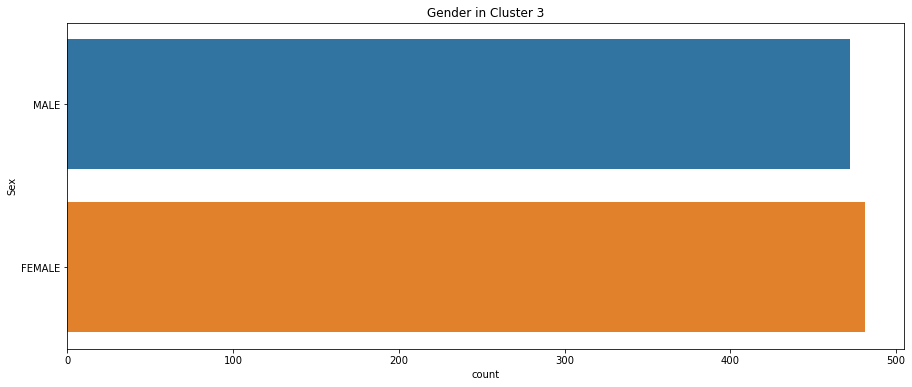

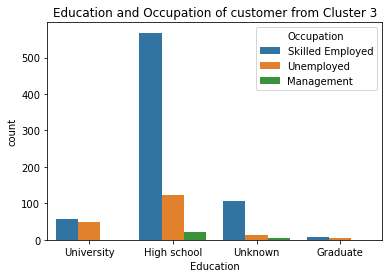

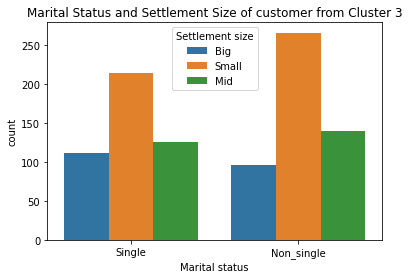

In [33]:
df_cl3['Sex'] = df_cl3['Sex'].map({0:'MALE', 1:'FEMALE'})

df_cl3['Education'] = df_cl3['Education'].map({0:'Unknown', 1:'High school',2:'University',3:'Graduate'})

df_cl3['Marital status'] = df_cl3['Marital status'].map({0:'Single', 1:'Non_single'})

df_cl3['Occupation'] = df_cl3['Occupation'].map({0:'Unemployed', 1:'Skilled Employed',2:'Management'})

df_cl3['Settlement size'] = df_cl3['Settlement size'].map({0:'Small', 1:'Mid',2:'Big'})

plt.figure(1, figsize=(15,6))
sns.countplot(y='Sex', data = df_cl3)
plt.title("Gender in Cluster 3")
plt.show()

sns.countplot(x = 'Education',
              hue = 'Occupation',
              data = df_cl3)
plt.title("Education and Occupation of customer from Cluster 3")
plt.show()

sns.countplot(x = 'Marital status',
              hue = 'Settlement size',
              data = df_cl3)
plt.title("Marital Status and Settlement Size of customer from Cluster 3")
plt.show()

# Grouping Clusters in Bottom-Up (Agglomerative) Fashion

In [34]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist 

row_clusters = linkage(pdist(df, metric='euclidean'), method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1', 'row label 2',
                      'distance', 'no. of items in clust.'],
             index=[f'cluster {i + 1}' for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust.
cluster 1,389.0,1493.0,1.000000,2.0
cluster 2,495.0,1344.0,1.732051,2.0
cluster 3,473.0,1159.0,2.000000,2.0
cluster 4,1654.0,1889.0,2.000000,2.0
cluster 5,946.0,1181.0,2.000000,2.0
...,...,...,...,...
cluster 1995,3987.0,3988.0,66418.000105,603.0
cluster 1996,3990.0,3992.0,96031.001187,60.0
cluster 1997,3991.0,3993.0,109646.004118,1337.0
cluster 1998,3994.0,3996.0,176188.003119,1940.0


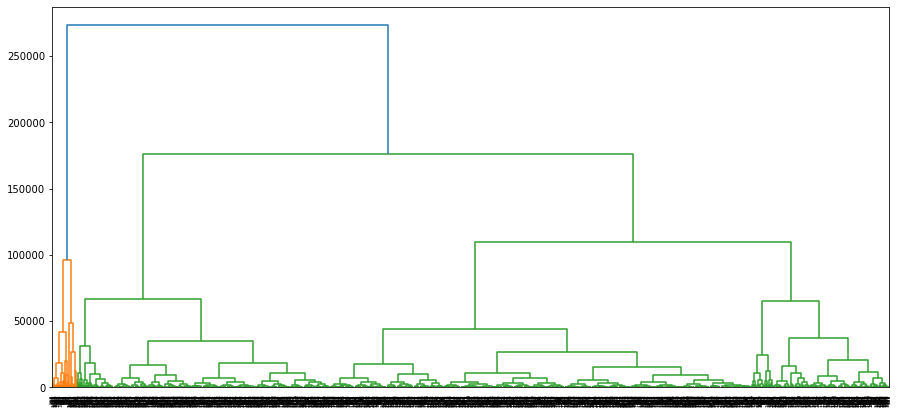

In [35]:
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
plt.figure(figsize=(15,7))
dendrogram(row_clusters)
plt.show()

As shown in the dendrogram there are 4 signnificant clusters. 

In [36]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4,affinity ='euclidean', linkage='ward')
Y_hc = hc.fit_predict(X1)
Y_hc

array([3, 2, 1, ..., 1, 1, 1])

In [37]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)
print(Y_hc)

[3 2 1 2 2 2 2 0 2 2 3 3 3 1 3 1 3 2 0 2 3 2 1 2 3 1 1 2 3 2 2 3 2 1 2 3 2
 3 3 1 2 3 2 2 2 2 2 1 3 3 1 2 1 3 2 1 0 2 2 3 3 3 2 0 3 2 3 2 3 3 2 1 2 2
 2 2 3 2 2 3 2 2 1 1 1 2 3 0 2 1 3 3 1 3 2 0 2 2 3 0 1 3 1 3 3 0 2 2 2 2 3
 3 3 2 2 3 0 3 2 2 3 2 1 2 3 3 1 1 2 3 2 2 1 3 0 3 0 3 3 3 1 2 2 3 3 2 3 3
 2 2 3 3 2 0 0 1 3 1 2 1 3 3 3 0 3 2 3 2 3 3 1 1 2 3 3 0 3 3 2 3 2 2 1 2 3
 1 0 1 1 2 0 3 2 3 3 2 3 3 3 2 2 1 3 1 1 0 3 3 3 2 3 3 2 2 2 1 3 2 1 3 1 1
 1 3 3 3 0 0 1 3 2 3 3 1 1 3 2 3 3 3 1 3 3 1 3 1 3 3 3 1 3 3 3 2 3 3 1 3 2
 3 1 3 2 3 1 3 2 3 0 1 3 2 0 3 2 3 3 1 2 2 2 3 3 3 2 2 3 0 3 3 1 0 0 2 0 0
 3 1 3 2 1 2 1 3 0 2 3 1 3 1 1 2 2 1 1 3 1 3 1 1 2 3 2 2 3 1 2 2 2 3 0 3 0
 2 3 2 1 1 3 1 2 1 2 2 3 1 1 1 1 2 1 3 2 2 3 1 3 2 1 3 3 2 2 1 1 3 3 3 3 2
 3 2 3 0 0 2 3 1 0 1 3 0 1 3 3 3 1 0 2 3 2 3 2 3 2 0 2 3 3 3 3 3 2 1 3 3 3
 1 2 2 3 0 2 3 3 2 1 2 2 3 2 3 1 2 3 3 3 2 1 1 3 0 2 3 3 3 1 2 1 1 2 3 3 1
 2 1 3 3 2 2 0 1 3 2 3 2 3 3 1 3 3 3 2 3 3 2 1 2 3 3 2 1 1 3 3 3 3 2 1 3 1
 3 0 2 2 2 3 2 1 3 1 0 3 

In [38]:
df['hierarchy_label'] = Y_hc
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label,hierarchy_label
0,0,0,67,2,124670,1,2,3,3
1,1,1,22,1,150773,1,2,1,2
2,0,0,49,1,89210,0,0,0,1
3,0,0,45,1,171565,1,1,1,2
4,0,0,53,1,149031,1,1,1,2
...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,3,3
1996,1,1,27,1,117744,1,0,3,3
1997,0,0,31,0,86400,0,0,0,1
1998,1,1,24,1,97968,0,0,3,1


### cluster 0

In [39]:
df_hc0 = df.loc[df['hierarchy_label']==0]
df_hc0

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label,hierarchy_label
7,0,0,35,1,193621,2,1,2,0
18,1,1,44,2,261952,2,2,2,0
56,0,0,52,1,202575,2,2,2,0
63,0,0,25,0,227385,1,2,2,0
87,0,0,47,1,241068,1,1,2,0
...,...,...,...,...,...,...,...,...,...
1090,0,0,71,2,192360,2,1,2,0
1092,1,1,45,2,260847,2,2,2,0
1093,0,0,65,2,285647,2,2,2,0
1097,0,0,57,2,281647,2,1,2,0


In [40]:
print('Number of Male Customers:',len(df_hc0[df_hc0.Sex== 1]),'customers')
print('Number of Female Customers:', len(df_hc0[df_hc0.Sex== 0]),'customers')
print('-----------------------------------')

print('Number of Unemployed Customers:',len(df_hc0[df_hc0.Occupation == 0]),'customers')
print('Number of Skilled Employed Customers:', len(df_hc0[df_hc0.Occupation == 1]),'customers')
print('Number of Managament Customers:', len(df_hc0[df_hc0.Occupation == 2]),'customers')

print('-----------------------------------')
print('Number of Single Customers:',len(df_hc0[df_hc0['Marital status'] == 0]),'customers')
print('Number of Non-single Customers:',len(df_hc0[df_hc0['Marital status'] == 1]),'customers')
print('-----------------------------------')

print('Unknown education :',len(df_hc0[df_hc0.Education == 0]),'customers')
print('Highschool level :', len(df_hc0[df_hc0.Education == 1]),'customers')
print('University level:', len(df_hc0[df_hc0.Education == 2]),'customers')
print('Graduate:', len(df_hc0[df_hc0.Education == 2]),'customers')

print('-----------------------------------')
print('Customers live in small city:',len(df_hc0[df_hc0['Settlement size'] == 0]),'customers')
print('Customers live in Mid-size city:',len(df_hc0[df_hc0['Settlement size'] == 1]),'customers')
print('Customers live in Big city:',len(df_hc0[df_hc0['Settlement size'] == 1]),'customers')


Number of Male Customers: 32 customers
Number of Female Customers: 78 customers
-----------------------------------
Number of Unemployed Customers: 0 customers
Number of Skilled Employed Customers: 28 customers
Number of Managament Customers: 82 customers
-----------------------------------
Number of Single Customers: 66 customers
Number of Non-single Customers: 44 customers
-----------------------------------
Unknown education : 16 customers
Highschool level : 44 customers
University level: 46 customers
Graduate: 46 customers
-----------------------------------
Customers live in small city: 8 customers
Customers live in Mid-size city: 44 customers
Customers live in Big city: 44 customers


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


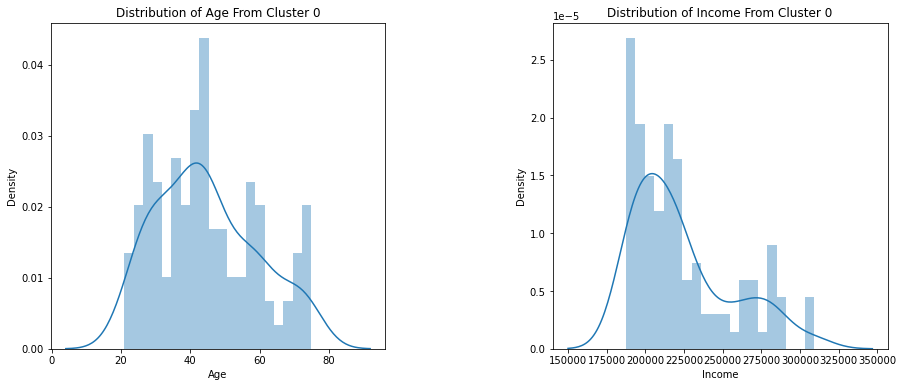

In [41]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_hc0[x], bins = 20)
    plt.title('Distribution of {} From Cluster 0'.format(x))
plt.show()

### Cluster 1

In [42]:
df_hc1 = df.loc[df['hierarchy_label']==1]

print('Number of Male Customers:',len(df_hc1[df_hc1.Sex== 1]),'customers')
print('Number of Female Customers:', len(df_hc1[df_hc1.Sex== 0]),'customers')
print('-----------------------------------')

print('Number of Unemployed Customers:',len(df_hc1[df_hc1.Occupation == 0]),'customers')
print('Number of Skilled Employed Customers:', len(df_hc1[df_hc1.Occupation == 1]),'customers')
print('Number of Managament Customers:', len(df_hc1[df_hc1.Occupation == 2]),'customers')

print('-----------------------------------')
print('Number of Single Customers:',len(df_hc1[df_hc1['Marital status'] == 0]),'customers')
print('Number of Non-single Customers:',len(df_hc1[df_hc1['Marital status'] == 1]),'customers')
print('-----------------------------------')

print('Unknown education :',len(df_hc1[df_hc1.Education == 0]),'customers')
print('Highschool level :', len(df_hc1[df_hc1.Education == 1]),'customers')
print('University level:', len(df_hc1[df_hc1.Education == 2]),'customers')
print('Graduate:', len(df_hc1[df_hc1.Education == 2]),'customers')

print('-----------------------------------')
print('Customers live in small city:',len(df_hc1[df_hc1['Settlement size'] == 0]),'customers')
print('Customers live in Mid-size city:',len(df_hc1[df_hc1['Settlement size'] == 1]),'customers')
print('Customers live in Big city:',len(df_hc1[df_hc1['Settlement size'] == 1]),'customers')


Number of Male Customers: 313 customers
Number of Female Customers: 247 customers
-----------------------------------
Number of Unemployed Customers: 432 customers
Number of Skilled Employed Customers: 122 customers
Number of Managament Customers: 6 customers
-----------------------------------
Number of Single Customers: 260 customers
Number of Non-single Customers: 300 customers
-----------------------------------
Unknown education : 103 customers
Highschool level : 415 customers
University level: 38 customers
Graduate: 38 customers
-----------------------------------
Customers live in small city: 479 customers
Customers live in Mid-size city: 42 customers
Customers live in Big city: 42 customers


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


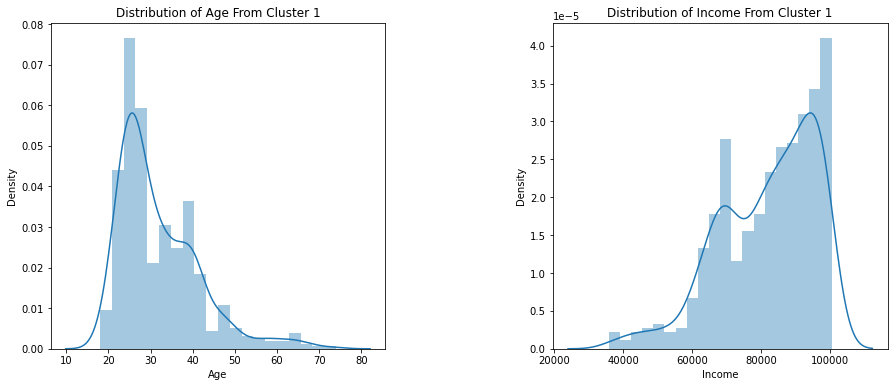

In [43]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_hc1[x], bins = 20)
    plt.title('Distribution of {} From Cluster 1'.format(x))
plt.show()

### Cluster 2

In [44]:
df_hc2 = df.loc[df['hierarchy_label']==2]

print('Number of Male Customers:',len(df_hc2[df_hc2.Sex== 1]),'customers')
print('Number of Female Customers:', len(df_hc2[df_hc2.Sex== 0]),'customers')
print('-----------------------------------')

print('Number of Unemployed Customers:',len(df_hc2[df_hc2.Occupation == 0]),'customers')
print('Number of Skilled Employed Customers:', len(df_hc2[df_hc2.Occupation == 1]),'customers')
print('Number of Managament Customers:', len(df_hc2[df_hc2.Occupation == 2]),'customers')

print('-----------------------------------')
print('Number of Single Customers:',len(df_hc2[df_hc2['Marital status'] == 0]),'customers')
print('Number of Non-single Customers:',len(df_hc2[df_hc2['Marital status'] == 1]),'customers')
print('-----------------------------------')

print('Unknown education :',len(df_hc2[df_hc2.Education == 0]),'customers')
print('Highschool level :', len(df_hc2[df_hc2.Education == 1]),'customers')
print('University level:', len(df_hc2[df_hc2.Education == 2]),'customers')
print('Graduate:', len(df_hc2[df_hc2.Education == 2]),'customers')

print('-----------------------------------')
print('Customers live in small city:',len(df_hc2[df_hc2['Settlement size'] == 0]),'customers')
print('Customers live in Mid-size city:',len(df_hc2[df_hc2['Settlement size'] == 1]),'customers')
print('Customers live in Big city:',len(df_hc2[df_hc2['Settlement size'] == 1]),'customers')

Number of Male Customers: 153 customers
Number of Female Customers: 338 customers
-----------------------------------
Number of Unemployed Customers: 35 customers
Number of Skilled Employed Customers: 309 customers
Number of Managament Customers: 147 customers
-----------------------------------
Number of Single Customers: 272 customers
Number of Non-single Customers: 219 customers
-----------------------------------
Unknown education : 61 customers
Highschool level : 296 customers
University level: 112 customers
Graduate: 112 customers
-----------------------------------
Customers live in small city: 82 customers
Customers live in Mid-size city: 221 customers
Customers live in Big city: 221 customers


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


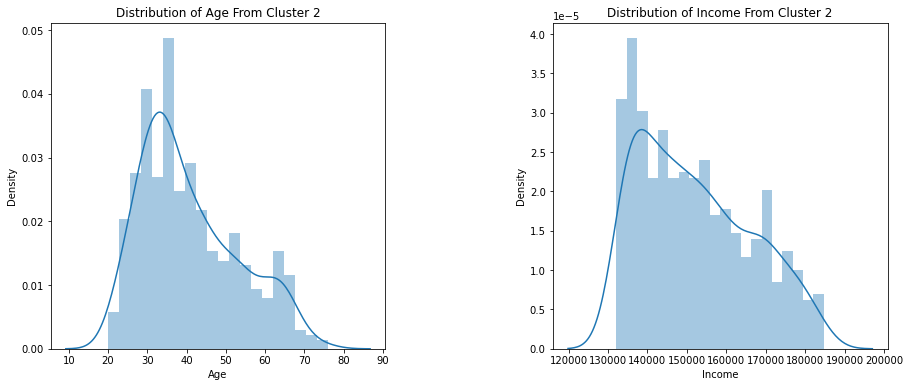

In [45]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_hc2[x], bins = 20)
    plt.title('Distribution of {} From Cluster 2'.format(x))
plt.show()

### Cluster 3

In [46]:
df_hc3 = df.loc[df['hierarchy_label']==3]
df_hc3

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,cluster_label,hierarchy_label
0,0,0,67,2,124670,1,2,3,3
10,1,1,25,1,108469,1,0,3,3
11,1,1,24,1,127596,1,0,3,3
12,1,1,22,1,108687,1,2,3,3
14,1,1,28,1,102899,1,1,3,3
...,...,...,...,...,...,...,...,...,...
1991,0,0,54,1,128537,1,0,3,3
1992,1,0,51,1,101074,0,0,3,3
1994,0,0,45,1,113414,1,0,3,3
1995,1,0,47,1,123525,0,0,3,3


/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/chaunguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


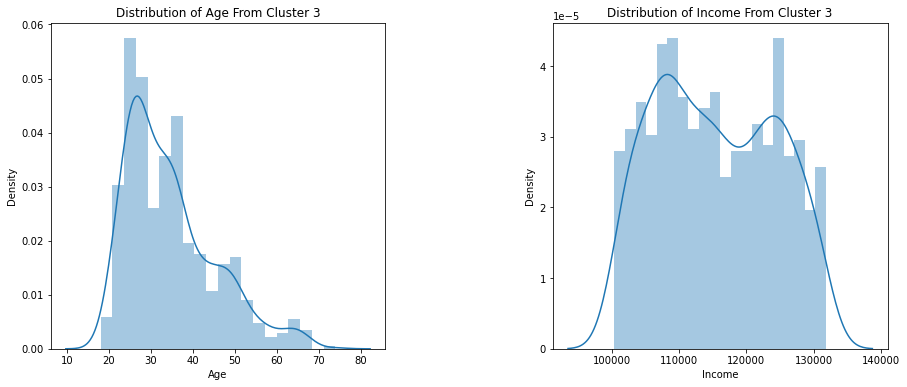

In [47]:
plt.figure(1, figsize=(15,6))
n= 0 
for x in ["Age", "Income"]:
    n+=1
    plt.subplot(1,2,n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(df_hc3[x], bins = 20)
    plt.title('Distribution of {} From Cluster 3'.format(x))
plt.show()

In [48]:
print('Number of Male Customers:',len(df_hc3[df_hc3.Sex== 1]),'customers')
print('Number of Female Customers:', len(df_hc3[df_hc3.Sex== 0]),'customers')
print('-----------------------------------')

print('Number of Unemployed Customers:',len(df_hc3[df_hc3.Occupation == 0]),'customers')
print('Number of Skilled Employed Customers:', len(df_hc3[df_hc3.Occupation == 1]),'customers')
print('Number of Managament Customers:', len(df_hc3[df_hc3.Occupation == 2]),'customers')

print('-----------------------------------')
print('Number of Single Customers:',len(df_hc3[df_hc3['Marital status'] == 0]),'customers')
print('Number of Non-single Customers:',len(df_hc3[df_hc3['Marital status'] == 1]),'customers')
print('-----------------------------------')

print('Unknown education :',len(df_hc3[df_hc3.Education == 0]),'customers')
print('Highschool level :', len(df_hc3[df_hc3.Education == 1]),'customers')
print('University level:', len(df_hc3[df_hc3.Education == 2]),'customers')
print('Graduate:', len(df_hc3[df_hc3.Education == 2]),'customers')

print('-----------------------------------')
print('Customers live in small city:',len(df_hc3[df_hc3['Settlement size'] == 0]),'customers')
print('Customers live in Mid-size city:',len(df_hc3[df_hc3['Settlement size'] == 1]),'customers')
print('Customers live in Big city:',len(df_hc3[df_hc3['Settlement size'] == 1]),'customers')

Number of Male Customers: 416 customers
Number of Female Customers: 423 customers
-----------------------------------
Number of Unemployed Customers: 166 customers
Number of Skilled Employed Customers: 654 customers
Number of Managament Customers: 19 customers
-----------------------------------
Number of Single Customers: 409 customers
Number of Non-single Customers: 430 customers
-----------------------------------
Unknown education : 107 customers
Highschool level : 631 customers
University level: 95 customers
Graduate: 95 customers
-----------------------------------
Customers live in small city: 420 customers
Customers live in Mid-size city: 237 customers
Customers live in Big city: 237 customers
